# Purpose of Analysis

### Question: stock product 1 or stock product 2?

### Confounding Vars
- price
- store
- promotion


### Key Factor
- sales

# Understanding Datafile

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import json
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing

In [36]:
df = pd.read_csv("PromoSalesDataByCountry.csv")

In [37]:
df.head()

,Unnamed: 0,storeNum,Year,Week,product1sales,product2sales,product1price,product2price,product1promo,product2promo,country
0,1,101,1,1,127,106,2.29,2.29,0,0,US
1,2,101,1,2,137,105,2.49,2.49,0,0,US
2,3,101,1,3,156,97,2.99,2.99,1,0,US
3,4,101,1,4,117,106,2.99,3.19,0,0,US
4,5,101,1,5,138,100,2.49,2.59,0,1,US


In [38]:
print(df.shape)

(2080, 11)


In [39]:
# clean up unnecessary columns

df = df.drop(df.columns[[0]], axis=1)

df.head()

,storeNum,Year,Week,product1sales,product2sales,product1price,product2price,product1promo,product2promo,country
0,101,1,1,127,106,2.29,2.29,0,0,US
1,101,1,2,137,105,2.49,2.49,0,0,US
2,101,1,3,156,97,2.99,2.99,1,0,US
3,101,1,4,117,106,2.99,3.19,0,0,US
4,101,1,5,138,100,2.49,2.59,0,1,US


### Check out sales

In [76]:
df['product1sales'].describe()

count    2080.000000
mean      133.048558
std        28.372599
min        73.000000
25%       113.000000
50%       129.000000
75%       150.000000
max       263.000000
Name: product1sales, dtype: float64

In [77]:
df['product2sales'].describe()

count    2080.000000
mean      119.260577
std        89.570368
min        51.000000
25%        84.750000
50%        98.000000
75%       117.250000
max       865.000000
Name: product2sales, dtype: float64

*oh wow ok so product 1 better in every way EXCEPT some weird anomaly that gives product 2 a much higher max and crazy sd.*

*gonna check confounding vars to find the anomaly*

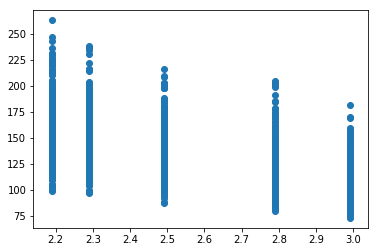

In [67]:
plt.scatter(df['product1price'],df['product1sales'])

In [68]:
df['product2price'].value_counts()

2.59    454
2.29    429
2.49    407
3.19    406
2.99    384
Name: product2price, dtype: int64

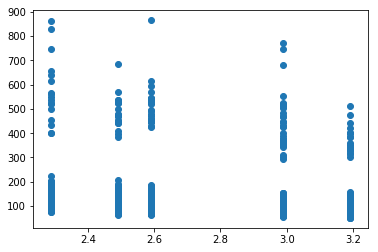

In [69]:
plt.scatter(df['product2price'],df['product2sales'])

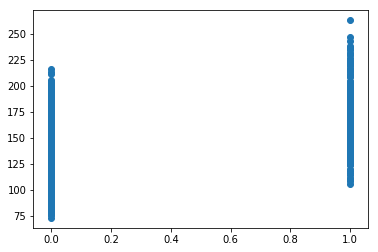

In [72]:
plt.scatter(df['product1promo'],df['product1sales'])

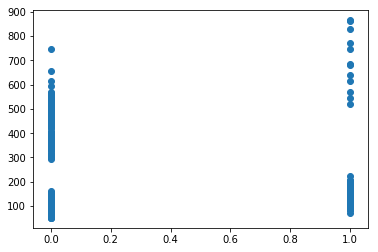

In [73]:
plt.scatter(df['product2promo'],df['product2sales'])

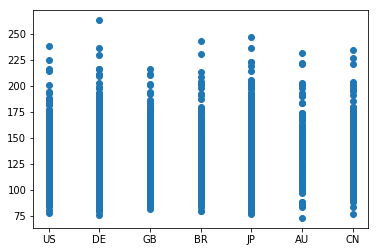

In [75]:
plt.scatter(df['country'],df['product1sales'])

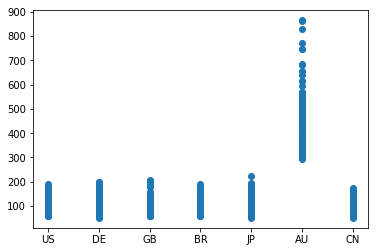

In [74]:
plt.scatter(df['country'],df['product2sales'])

*found it!*

*auzzies love product 2*

*let's check if we segment the data by australia we'll see this effect*

In [85]:
dfAus = df.loc[df['country'] == 'AU']
dfAus['product1sales'].describe()

count    104.000000
mean     139.846154
std       31.275403
min       73.000000
25%      117.750000
50%      138.000000
75%      154.500000
max      232.000000
Name: product1sales, dtype: float64

In [84]:
dfAus['product2sales'].describe()

count    104.000000
mean     477.596154
std      118.340017
min      295.000000
25%      400.000000
50%      460.000000
75%      531.250000
max      865.000000
Name: product2sales, dtype: float64

*whoops still giant sd. lets see what else we can do*

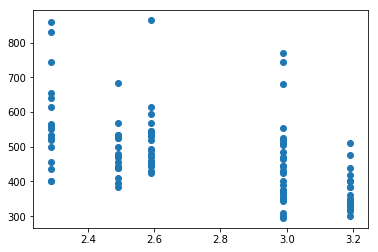

In [88]:
plt.scatter(dfAus['product2price'],dfAus['product2sales'])

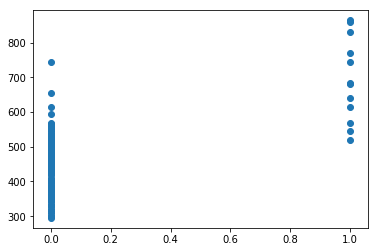

In [89]:
plt.scatter(dfAus['product2promo'],dfAus['product2sales'])

*looks like promo?*

In [90]:
dfAusPr = dfAus.loc[df['product2promo'] == 1]
dfAusPr['product1sales'].describe()

count     12.000000
mean     130.250000
std       34.465068
min       83.000000
25%      117.000000
50%      131.000000
75%      136.000000
max      221.000000
Name: product1sales, dtype: float64